In [1]:
import cifar10

In [2]:
cifar10.data_path = "data/CIFAR-10/"

In [3]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [4]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [6]:
#visualizing the shapes.......
print(images_train.shape)
print(labels_train.shape)

(50000, 32, 32, 3)
(50000, 10)


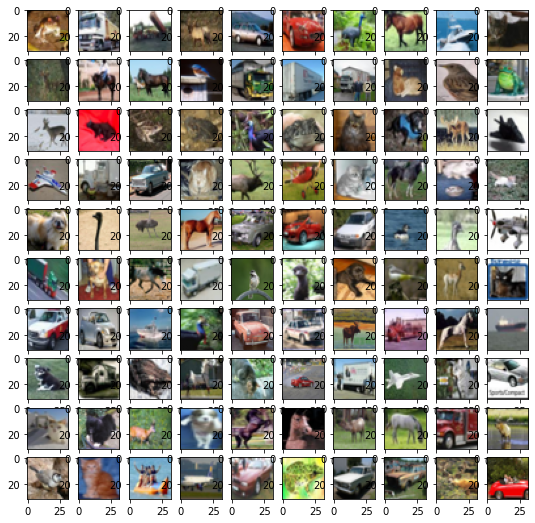

In [8]:
#creating a subplot with the images.......
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(9,9))
for i in range(100):
    ax=fig.add_subplot(10,10,i+1)
    ax.imshow(images_train[i])
plt.show()

In [9]:
#using PCA
from sklearn.decomposition import PCA
pca=PCA()

In [18]:
#reshaping the images
images_train_reshaped = images_train.reshape(50000,32*32*3)
images_train_reshaped.shape

(50000, 3072)

In [19]:
pca.fit(images_train_reshaped)

PCA()

In [20]:
pca.explained_variance_

array([5.53633226e+01, 2.14265348e+01, 1.27464910e+01, ...,
       1.64690026e-06, 1.60936325e-06, 1.58719044e-06])

In [23]:
#finding optimal k or number of features
k=0
variance=0
total=sum(pca.explained_variance_)
while(variance/total < 0.99):
    variance+=pca.explained_variance_[k]
    k+=1
k

658

In [25]:
#fitting and transforming trainig data
pca1=PCA(n_components=k,whiten=True)
images_train_reshaped_pca_transformed=pca1.fit_transform(images_train_reshaped)

In [26]:
images_train_reshaped_pca_transformed

array([[-0.86027628,  0.58956777,  0.42062095, ..., -0.87083226,
         1.49128051,  0.18609875],
       [ 0.11152023, -0.20522094,  1.68161846, ..., -0.4379955 ,
        -1.79016799, -0.87465369],
       [ 1.03891411, -2.48917687, -0.77127413, ..., -1.52952356,
         0.76867676,  0.34807119],
       ...,
       [ 0.09506512, -2.45038108, -0.11033342, ...,  0.89161984,
         0.1041176 ,  0.98402938],
       [ 1.52781059, -0.72932918,  1.5590617 , ...,  0.16727348,
         1.47414444, -0.23286787],
       [ 0.56349842, -0.25582611, -1.24529006, ..., -1.97780681,
        -1.12789103, -0.64185244]])

In [27]:
images_test

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

In [29]:
#images_test. reshaped
images_test.shape
images_test_reshaped=images_test.reshape((10000,32*32*3))

In [ ]:
# pca transformed images
images_test_reshaped=pca1.transform(images_test_reshaped)

In [38]:
images_test_reshaped.shape

(10000, 658)

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
rfc=RandomForestClassifier()

In [43]:
rfc.fit(images_train_reshaped_pca_transformed,cls_train)

RandomForestClassifier()

In [44]:
cls_pred = rfc.predict(images_test_reshaped)
print(classification_report(cls_test, cls_pred))
print('<--------------------------------------------------------------------------------------------------------------------->')
print(confusion_matrix(cls_test,cls_pred ))

              precision    recall  f1-score   support

           0       0.44      0.50      0.47      1000
           1       0.41      0.49      0.45      1000
           2       0.29      0.25      0.26      1000
           3       0.24      0.22      0.23      1000
           4       0.37      0.37      0.37      1000
           5       0.32      0.31      0.32      1000
           6       0.44      0.46      0.45      1000
           7       0.41      0.31      0.36      1000
           8       0.51      0.54      0.52      1000
           9       0.42      0.43      0.42      1000

    accuracy                           0.39     10000
   macro avg       0.38      0.39      0.39     10000
weighted avg       0.38      0.39      0.39     10000

<--------------------------------------------------------------------------------------------------------------------->
[[502  64  59  35  29  31  31  26 171  52]
 [ 59 495  21  44  18  35  38  36  64 190]
 [140  38 246  96 176  79  91  61  

In [45]:
cls_pred

array([3, 1, 8, ..., 5, 7, 7])

In [51]:
#predictions
predictions=[]
for i in range(len(cls_pred)):
    predictions.append(class_names[cls_pred[i]])
predictions

['cat',
 'automobile',
 'ship',
 'ship',
 'frog',
 'cat',
 'cat',
 'deer',
 'dog',
 'ship',
 'airplane',
 'truck',
 'dog',
 'automobile',
 'truck',
 'ship',
 'dog',
 'truck',
 'ship',
 'horse',
 'horse',
 'airplane',
 'airplane',
 'automobile',
 'deer',
 'frog',
 'cat',
 'bird',
 'truck',
 'frog',
 'frog',
 'deer',
 'deer',
 'dog',
 'truck',
 'horse',
 'dog',
 'truck',
 'horse',
 'dog',
 'airplane',
 'deer',
 'cat',
 'cat',
 'ship',
 'airplane',
 'cat',
 'cat',
 'deer',
 'deer',
 'truck',
 'ship',
 'frog',
 'frog',
 'ship',
 'ship',
 'horse',
 'frog',
 'ship',
 'frog',
 'deer',
 'frog',
 'automobile',
 'truck',
 'bird',
 'bird',
 'truck',
 'frog',
 'truck',
 'truck',
 'bird',
 'cat',
 'airplane',
 'ship',
 'airplane',
 'bird',
 'automobile',
 'dog',
 'cat',
 'automobile',
 'ship',
 'automobile',
 'automobile',
 'airplane',
 'airplane',
 'horse',
 'automobile',
 'ship',
 'ship',
 'airplane',
 'airplane',
 'airplane',
 'ship',
 'truck',
 'deer',
 'cat',
 'frog',
 'ship',
 'horse',
 'deer

In [50]:
from collections import Counter
Counter(class_names)

Counter({'airplane': 1,
         'automobile': 1,
         'bird': 1,
         'cat': 1,
         'deer': 1,
         'dog': 1,
         'frog': 1,
         'horse': 1,
         'ship': 1,
         'truck': 1})

In [53]:
import numpy as np
np.savetxt("predictions_cifar_10.csv", predictions, delimiter=',', fmt="%s")